# Tracé des diagrammes de Bode en utilisant les résultats obtenus à l'oscilloscope.

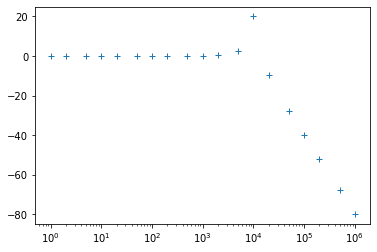

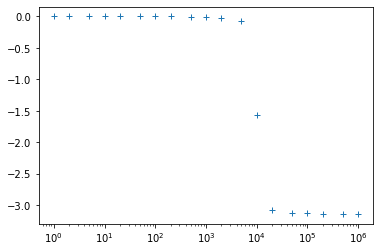

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Rentrer les différentes fréquences choisies (en Hz) puis les différentes amplitudes et phase mesurées
frequence = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6])
amplitude = np.array([ 1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00, 1.01,  1.04,  1.33,  10.00,  0.33,  0.04,  0.0101,  0.0025,  0.0004,  0.0001])
dephasage = np.array([-0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.00, -0.01, -0.01, -0.02, -0.07, -1.57, -3.08, -3.12, -3.13, -3.14, -3.14, -3.14])

plt.figure(1)
plt.plot(frequence,20*np.log10(amplitude),'+')
plt.xscale('log')
plt.show()
plt.figure(2)
plt.plot(frequence,dephasage,'+')
plt.xscale('log')
plt.show()

# Simulation

<IPython.core.display.Javascript object>


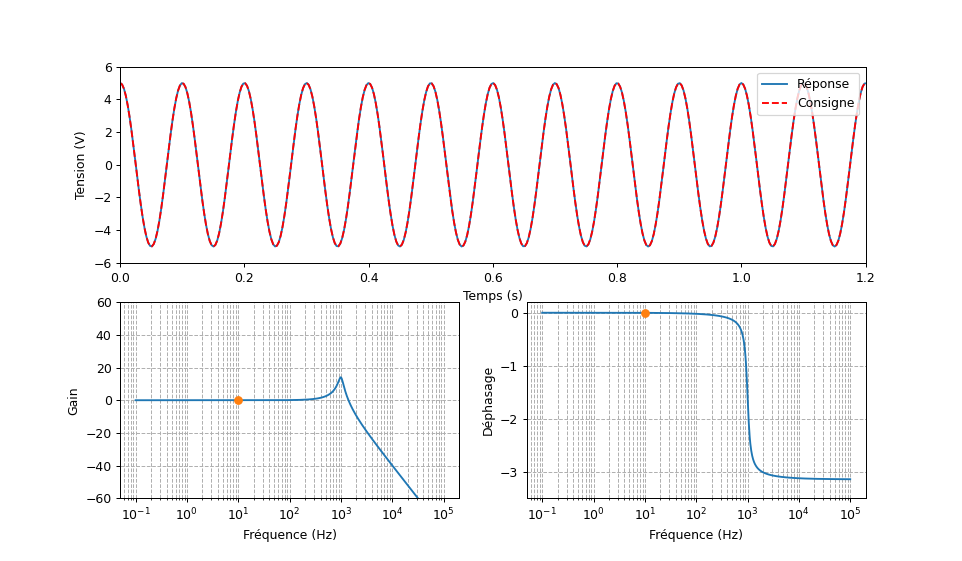

interactive(children=(FloatLogSlider(value=5.0, description='Q', layout=Layout(width='800px'), max=2.0, min=-2…

In [4]:
from ipywidgets import interact, Layout, widgets
%matplotlib notebook

def sortie(Q,f0,f,e): 
    '''
    Fonction qui retourne la valeur de l'amplitude et du déphasage par rapport au terme de forçage
    '''
    x = f/f0
    Amplitude = e/np.sqrt(np.square(1-np.square(x))+np.square(x/Q))
    Déphasage = -np.pi/2-np.arctan(Q*(np.square(x)-1)/x)
    return Amplitude, Déphasage

fig = plt.figure(3,figsize = (12,7))
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 2, 3)
ax2 = fig.add_subplot(2, 2, 4)
F = np.logspace(-1,5,1000)
line0a, line0b, = ax0.plot([],[],[],[],'r--')
line1a,line1b = ax1.plot(F,F,[],[],'o')
line2a,line2b = ax2.plot(F,F,[],[],'o')
ax0.set_ylim([-6,6])
ax0.set_xlim([0,100])
line0a.set_label('Réponse')
line0b.set_label('Consigne')
ax0.legend(loc = 'upper right')
ax0.set_xlabel('Temps (s)')
ax0.set_ylabel('Tension (V)')
ax1.set_ylim([-3*20,20*3])
ax1.set_xlabel('Fréquence (Hz)')
ax1.set_ylabel('Gain')
ax1.set_xscale('log')
ax1.grid(True,which="both",linestyle='--')
ax2.set_xscale('log')
ax2.set_ylim([-3.5,0.2])
ax2.grid(True,which="both",linestyle='--')
ax2.set_xlabel('Fréquence (Hz)')
ax2.set_ylabel('Déphasage')


def tracer(Q,f0,f,e):
    '''
    Trace les diagrammes de Bode et la réponse temporelle
    f est ici un scalaire (pas un tableau) uniquement utilisé pour tracer le signal temporel
    '''
    global F
    #pour tracer sur une échelle de temps correspondant à n périodes du signal
    n = 30
    t = np.linspace(0,n/f,1000) 
    #pour tracer les diagrammes de Bode de 1 Hz à 1MHz
    Amplitude, Déphasage = sortie(Q,f0,F,e)
    G = 20*np.log10(Amplitude/e)
    a, d = sortie(Q,f0,f,e)
    #Tracé des figures
    line0a.set_ydata(a*np.cos(2*np.pi*f*t+d))
    line0b.set_ydata(e*np.cos(2*np.pi*f*t))
    line0a.set_xdata(t)
    line0b.set_xdata(t)
    line1a.set_ydata(G)
    line1b.set_ydata(20*np.log10(a/e))
    line1b.set_xdata(f)
    line2a.set_ydata(Déphasage)
    line2b.set_ydata(d)
    line2b.set_xdata(f)
    xmin0,xmax0 = ax0.get_xlim()
    ymin0,ymax0 = ax0.get_ylim()
    if xmax0-xmin0 > n/f or xmax0-xmin0 < 0.1*n/f:#calibre de temps automatique
        ax0.set_xlim([0,0.4*n/f])
    if ymax0 < a and a > 1.2*e:
            ax0.set_ylim([-a*2,a*2])      
    elif ymax0 > 4*a and ymax0 > 1.2*e:
        ax0.set_ylim([-np.max([a,e])*1.2,np.max([a,e])*1.2])    
    fig.canvas.draw_idle()
    plt.show()

interact(tracer,
    Q=widgets.FloatLogSlider(
        value=5,
        base=10,
        min=-2, 
        max=2, 
        step=0.01, 
        description='Q',
        layout=Layout(width='800px')), 
    f0=widgets.FloatLogSlider(
        value=1000,
        base=10,
        min=-1, 
        max=4, 
        step=0.001, 
        description='f0',
        layout=Layout(width='800px')),
    f=widgets.FloatLogSlider(
        value=10,
        base=10,
        min=-1, 
        max=4, 
        step=0.001, 
        description='f',
        layout=Layout(width='800px')),
    e=(1,10,0.1));





In [3]:
#Pour simuler un jeu de données d'amplitude et de phase à partir d'un jeu de fréquences
amp,deph = sortie(10,10e3,frequence,1)
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
amp

array([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0001,
        1.0004,  1.0025,  1.0100,  1.0414,  1.3304,  10.0000,  0.3326,
        0.0417,  0.0101,  0.0025,  0.0004,  0.0001])